This book is to practice building gaussian distributons from numpy and scipy normal distribution package.

And then run statistical checks to see if the samples are independent 

Random normal generator:
mean: 50.08642166490418 median: 50.19525025834205
Scipy normal generator:
mean: 49.616488037435175 median: 49.57199467695061


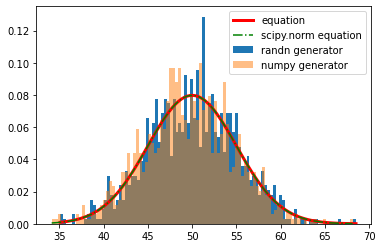

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from scipy import stats
import scipy.integrate

np.random.seed(3)

#numpy randn generates n random floats from normal distribution 
sigma=5,
mu=50
n=1000
data= sigma*np.random.randn(n) + mu 
count,bins,patches=plt.hist(data, bins=100, label='randn generator', density=True) #density=True normalize the histogram such that the area under the histogram ==1

#the normal equation
sigma=5
mu=50
plt.plot (bins,  1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ) , linewidth=3, color='r',label='equation') #gauss equation

#generates n random floats from scipy's normal distribution 
data2=stats.norm.rvs(loc=mu,scale=sigma, size=n)
count,bins,patches=plt.hist(data2,bins=100,label='numpy generator', density=True, alpha=0.5)
plt.plot(bins,stats.norm.pdf(bins,loc=mu,scale=sigma) , linestyle ='-.', color='g', label='scipy.norm equation')
plt.legend()

mean_rand=np.mean(data)
median_rand=np.median(data)
mean_scipy=np.mean(data2)
median_scipy=np.median(data2)
print('Random normal generator:')
print ('mean:',  mean_rand, 'median:', median_rand ,sep=' '   )
print('Scipy normal generator:')
print ('mean:',  mean_scipy, 'median:', median_scipy ,sep=' '   )



Gaussian critical values.
given probability (area under the gaussian curve), we can calculate the percent point function. 
The integration is always from -infinity to the right. such that the probablity begins from the left side of the curve

In [36]:
# definite probabiliyt of 95% under the curve.
value=stats.norm.ppf(0.95) #ppf percent point function
print('gauss critical value:', value)

# integrate to critical value to check if the probability is true
print(stats.norm.cdf(value))

gauss critical value: 1.6448536269514722
0.95


Check whether data and data2 are correlated using Pearson's correlation.

H0: the two samples are independent.
H1: there is a dependency between the samples.

In [4]:
stat,p= stats.pearsonr(data,data2)
print ('stat=%.3f, p-value=%0.3f' % (stat,p))

stat=0.034, p-value=0.283


Student's t-test 
Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [105]:
stat,p=stats.ttest_ind(data,data2)
print ('stat=%.3f, p-value=%0.3f' % (stat,p))

stat=0.255, p-value=0.799


No handles with labels found to put in legend.


Probability of obtaining x between 45 to 55 is: 0.6826894921370861
using norm.cdf:  0.6826894921370859
P(X<k)=0.80 is: 54.20810616786457
P(X>k)=0.80 is: 45.79189383213543
Confidence interval at 80% : (43.592242172277, 56.407757827723)


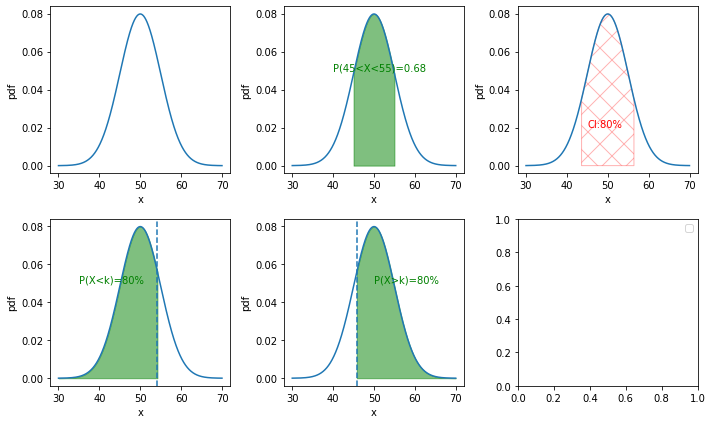

In [81]:


# normal distribution of mean=50 and sigma =5
x=np.arange(30,70,0.01)
data1=stats.norm.pdf(x, loc=50, scale=5) #loc=mean , scale= sigma

fig,ax=plt.subplots(figsize=(10,6),ncols=3,nrows=2)
ax[0][0].plot(x, data1,label='N(mu=50,std=5)') 
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('pdf')
plt.legend()

#the probability x between values 45,55 is equivalent to the area under the curve 
#create function to integrate
gaussian=lambda x,sigma,mu:  1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ) 
#scipy.integrate.quad (a method of integration) returns the answer and the error of the answer in a tulple. 
value,error= scipy.integrate.quad( gaussian,45,55, args=(5,50))
print('Probability of obtaining x between 45 to 55 is:',value)
# this is also equivalent to doing to subtraction on the cumulative distribution function 
print('using norm.cdf: ', stats.norm.cdf(x=55,loc=50,scale=5)-stats.norm.cdf(x=45,loc=50,scale=5))


#plot
ax[0][1].plot(x, data1,label='N(mu=50,std=5)') 
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('pdf')
px=np.arange(45,55,0.01)
ax[0][1].fill_between(px,stats.norm.pdf(px, loc=50, scale=5 ), alpha=0.5, color='g')
ax[0][1].text(40,0.05,"P(45<X<55)=%0.2f" % (value), color='g' )


#Finding quantiles
# Find the k in the 80% quantile. 
# This is mathematically written as, given probability of P(X< k)= 80% , get k. 
print ('P(X<k)=0.80 is:',stats.norm.ppf(q=0.8, loc=50,scale=5))
smaller=stats.norm.ppf(q=0.8, loc=50,scale=5)
ax[1][0].plot(x, data1,label='N(mu=50,std=5)') 
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('pdf')
ax[1][0].axvline(x=smaller,linestyle='--')
px=np.arange(30,smaller,0.01)
ax[1][0].fill_between(px,stats.norm.pdf(px, loc=50,scale=5 ), alpha=0.5, color='g')
ax[1][0].text(35,0.05,"P(X<k)=80%", color='g' )

## ppf function gets the probability from the left. (less than).
# to get more than P(X>k)=80%
print('P(X>k)=0.80 is:',stats.norm.isf(q=0.8, loc=50,scale=5) )
ax[1][1].plot(x, data1,label='N(mu=50,std=5)') 
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('pdf')
larger=stats.norm.isf(q=0.8, loc=50,scale=5) 
ax[1][1].axvline(x=larger,linestyle='--')
px=np.arange(larger,70,0.01)
ax[1][1].fill_between(px,stats.norm.pdf(px, loc=50,scale=5 ), alpha=0.5, color='g')
ax[1][1].text(50,0.05,"P(X>k)=80%", color='g' )

#to get confidence interval around the mean, use the norm.interval module
print ('Confidence interval at 80% :', stats.norm.interval(alpha=0.8, loc=50,scale=5))
cil,cih=stats.norm.interval(alpha=0.8, loc=50,scale=5)
ax[0][2].plot(x, data1,label='N(mu=50,std=5)') 
ax[0][2].set_xlabel('x')
ax[0][2].set_ylabel('pdf')
px=np.arange(cil,cih,0.01)
ax[0][2].fill_between(px,stats.norm.pdf(px, loc=50,scale=5 ), alpha=0.3, color='none', hatch='X', edgecolor='r')
ax[0][2].text(45,0.02,"CI:80%", color='red' )
plt.tight_layout()
plt.show()


#to convert standardize the normal distribution 

In [42]:
# sampling randomly from standard python API
import random as rand

rand.seed (1) #determinisitc randomness 
 
#uniform random float between 0-1
random_uniform_data=[]
for _ in range (100):
    value=rand.random() #because random() does not take any argument so we need to use a for loop
    random_uniform_data.append(value)
    #print(value)
print(random_uniform_data)
print('\n')

#randomly selecting 10 numbers from 5,6,7,8..19 (19 numbers arranged) 
random_data=rand.sample(range(5,20),10) 
print("10 random numbers between 5,20:", random_data)
print('randomly selecting a value from above list', rand.sample(random_data, 1))

#randomly selecting a number from 5,7,9,11, ... 10 numbers generated from a rule (interval of 2 steps)
rand_interval= rand.randrange(5,20,2) #start,stop, interval
print (rand_interval)

#randrange is equivalent to choice
rand_choice=rand.choice(range(5,20,2))
print(rand_choice)

#creating a sample (without replacement) from population for two fruits
food=rand.sample(['potato','banana'], counts=[10,15],k=25) # counts is a method to how may times potato and banana would appear. k is the number of data
print('food bowl generator:', food)
print('prob of potato theory:', 10/25)
print('prob of potato in food bowl: ',food.count('potato')/25)

#rand.choice with replacement from propulation with weights. 
fair_die=rand.choices(['H','T'], cum_weights=(0.5,1.), k=50).count('H')/50 #cum_weights, goes as first item is 0.5 then second is 0.5 which adds to 1.0
unfair_die=rand.choices(['H','T'], cum_weights=(0.6,1.), k=50).count('H')/50

print (fair_die, unfair_die)


[0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217, 0.49543508709194095, 0.4494910647887381, 0.651592972722763, 0.7887233511355132, 0.0938595867742349, 0.02834747652200631, 0.8357651039198697, 0.43276706790505337, 0.762280082457942, 0.0021060533511106927, 0.4453871940548014, 0.7215400323407826, 0.22876222127045265, 0.9452706955539223, 0.9014274576114836, 0.030589983033553536, 0.0254458609934608, 0.5414124727934966, 0.9391491627785106, 0.38120423768821243, 0.21659939713061338, 0.4221165755827173, 0.029040787574867943, 0.22169166627303505, 0.43788759365057206, 0.49581224138185065, 0.23308445025757263, 0.2308665415409843, 0.2187810373376886, 0.4596034657377336, 0.28978161459048557, 0.021489705265908876, 0.8375779756625729, 0.5564543226524334, 0.6422943629324456, 0.1859062658947177, 0.9925434121760651, 0.8599465287952899, 0.12088995980580641, 0.3326951853601291, 0.7214844075832684, 0.7111917696952796, 0.9364405867994596, 0.4221069999614152, 0.830035693274327, 0

The Kolnogorov Smirnoff KS test is a non-parametric and distribution-free test: It makes no assumption about the distribution of data. The KS test can be used to compare a sample with a reference probability distribution, or to compare two samples.

sample_N(0,1) vs. N(0, 1): KS=0.0114 with p-value = 0.1487.


<AxesSubplot:ylabel='Frequency'>

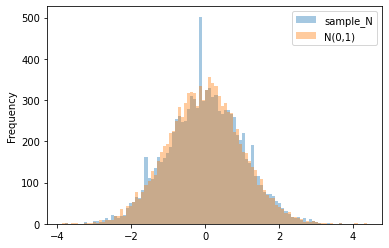

In [8]:
import random
import pandas as pd
import math

N=10000
random.seed(123)

def bernoulli():
    return random.randint(0,1)

# Our sample function of N(0,1) using Equation 5
def sampleN_v1(N=2500):
    return 2.0 * math.sqrt(N) * (sum(bernoulli() for x in range(N)) / N - 0.5)

# Use KS to test again
samples = [sampleN_v1() for x in range(N)]
test_stat, pvalue = stats.kstest(samples, 'norm', args=(0, 1), N=N)
print("sample_N(0,1) vs. N(0, 1): KS=%.4f with p-value = %.4f." % (test_stat, pvalue))

# Let's plot our samples against our reference distribution
reference = [stats.norm.rvs() for x in range(N)]
pd.DataFrame({'sample_N': samples, 'N(0,1)': reference}).plot(kind='hist', bins=100, alpha=0.4)

Bootstrap Method
The bootstrap method is a statistical technique for estimating the population parameters from multiple small data samples.
Samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample aftert hey've been choosen.


In [20]:
nsample=4
data=np.arange(0.1,0.7, 0.1)
data

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [28]:
from sklearn.utils import resample

boot= resample(data, replace=True, n_samples=nsample, random_state=1)
oob=[x for x in data if x not in boot] # hold out for testing


[0.30000000000000004, 0.2]

Statistical power